In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ML-412/Dataset/csv_data'

/content/drive/.shortcut-targets-by-id/1jLI1nvN7MpQ9qBGaND8lJVPUyYcCk_rI/ML-412/Dataset/csv_data


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import warnings
warnings.simplefilter("ignore")

In [74]:
!ls

avg.csv  bus.csv  review.csv  tips.csv	users.csv  vaderScores.csv


### Loading Data

In [4]:
review_df = pd.read_csv('review.csv')
business_df = pd.read_csv('bus.csv')
user_df = pd.read_csv('users.csv')
tips_df = pd.read_csv('tips.csv')
scores = pd.read_csv('vaderScores.csv')

In [5]:
avg_df = pd.read_csv('avg.csv')

In [6]:
review_df = review_df.drop(columns='Unnamed: 0')
business_df = business_df.drop(columns='Unnamed: 0')
user_df = user_df.drop(columns='Unnamed: 0')
tips_df = tips_df.drop(columns='Unnamed: 0')

--> what is the data like?

In [12]:
review_df.head()

,user_id,business_id,stars,useful,funny,cool,text
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is..."
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo..."
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...


In [8]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,checkin_dates
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Restaurants', ' Food', ' Bubble Tea', ' Coff...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","2010-08-18 17:05:36, 2010-11-25 17:45:31, 2011..."
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Brewpubs', ' Breweries', ' Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...","2019-06-28 21:35:09, 2019-09-12 21:07:48, 2019..."
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","['Burgers', ' Fast Food', ' Sandwiches', ' Foo...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...","2012-12-16 05:27:33, 2013-02-15 04:00:46, 2013..."
3,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","['Sporting Goods', ' Fashion', ' Shoe Stores',...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...","2010-08-30 23:57:24, 2010-09-12 19:06:35, 2010..."
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","['Pubs', ' Restaurants', ' Italian', ' Bars', ...",NaN,"2012-04-16 22:28:12, 2012-04-20 22:38:55, 2012..."


In [9]:
user_df.head()

,user_id,review_count,fans,useful,elite_count,friend_count
0,qVc8ODYU5SZjKXVBgXdI7w,585,267,7217,1,14995
1,j14WgRoU_-2ZE1aw1dXrJg,4333,3138,43091,14,4646
2,2WnXYQFK0hXEoTxPtV2zvg,665,52,2086,5,381
3,SZDeASXq7o05mMNLshsdIA,224,28,512,3,131
4,hA5lMy-EnncsH4JoR-hFGQ,79,1,29,1,27


In [10]:
tips_df.head()

,user_id,business_id,text,date,compliment_count
0,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
1,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
2,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
3,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
4,trf3Qcz8qvCDKXiTgjUcEg,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0


In [11]:
avg_df.head()

,business_id,stars,useful_x,funny,cool,review_count,fans,useful_y,elite_count,friend_count
0,---kPU91CF4Lq2-WlRu9Lw,4.500000,0.666667,0.041667,0.541667,43.958333,2.125000,36.083333,1.291667,29.791667
1,--0iUa4sNDFiZFrAdIWhZQ,3.214286,1.785714,0.214286,0.285714,241.785714,13.571429,295.142857,2.428571,77.785714
2,--7PUidqRWpRSpXebiyxTg,1.750000,0.750000,0.166667,0.000000,301.750000,14.833333,491.916667,3.416667,90.250000
3,--8IbOsAAxjKRoYsBFL-PA,2.925926,1.111111,0.185185,0.296296,105.444444,12.740741,301.518519,2.703704,105.296296
4,--MbOh2O1pATkXa7xbU6LA,3.962963,0.777778,0.259259,0.259259,114.296296,17.148148,1033.629630,2.555556,81.148148


### Data Cleaning and Pre-Processing

For Business Data

In [83]:
import ast
r_dict = str({'unknown':0})
business_df.attributes = business_df.attributes.replace(np.nan,r_dict)
attributes = pd.json_normalize(business_df['attributes'].apply(ast.literal_eval))

In [84]:
business_df = business_df.drop('attributes',axis =1)
business_df = business_df.join(attributes)

In [85]:
business_df = business_df.drop('unknown',axis =1)

In [86]:
y = business_df.drop(['business_id','name','address','city','state','postal_code','latitude','longitude','stars',                      
  'review_count', 'is_open' ,'categories','hours','checkin_dates', 'BusinessParking', 'RestaurantsPriceRange2', 'WiFi', 'Alcohol', 'RestaurantsAttire', 'Ambience', 'NoiseLevel', 'GoodForMeal', 'Smoking', 'Music', 'BestNights', 'BYOBCorkage','DietaryRestrictions','HairSpecializesIn'], axis =1)   


In [87]:
y = y.replace('True',1)
y = y.replace('False',0)
y = y.replace('None',0)

In [88]:
y = y.replace(np.nan,0.0)     #Assuming that Nan as not applicable and similar to none, false.

In [89]:
y_c = list(y.columns)

In [90]:
business_df = business_df.drop(y_c,axis = 1 )

In [91]:
business_df = business_df.join(y)

In [92]:
business_df['postal_code'] = business_df['postal_code'].replace(np.nan, 'unknown')
business_df['address'] = business_df['address'].replace(np.nan, 'unknown')
business_df['hours'] = business_df['hours'].replace(np.nan, 'unknown')

In [93]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HappyHour,DriveThru,BusinessAcceptsBitcoin,GoodForDancing,BYOB,Corkage,AcceptsInsurance,RestaurantsCounterService,Open24Hours,AgesAllowed
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For averages Data

In [94]:
avg_df = pd.read_csv('avg.csv')
# avg_df.rename(columns = {'useful_x':'good_review', 'useful_y':'good_user'}, inplace = True)
avg_df.columns = ['average_' + str(col) for col in avg_df.columns]
avg_df.rename(columns = {'average_useful_x':'average_good_review', 'average_useful_y':'average_good_user','average_business_id':'business_id'}, inplace = True)

In [95]:
avg_df.isna().any()

business_id             False
average_stars           False
average_good_review     False
average_funny           False
average_cool            False
average_review_count    False
average_fans            False
average_good_user       False
average_elite_count     False
average_friend_count    False
dtype: bool

For reviews data

In [96]:
review_df['score'] = scores.score
review_df.head()

,user_id,business_id,stars,useful,funny,cool,text,score
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",0.8597
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,0.9201
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",0.9588
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,0.9815
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,0.7117


## Rating prediction

Finding Correlation between stars and other features

In [97]:
a = list(y.columns)
a.append('stars')
b = a

In [98]:
corr = business_df[b]

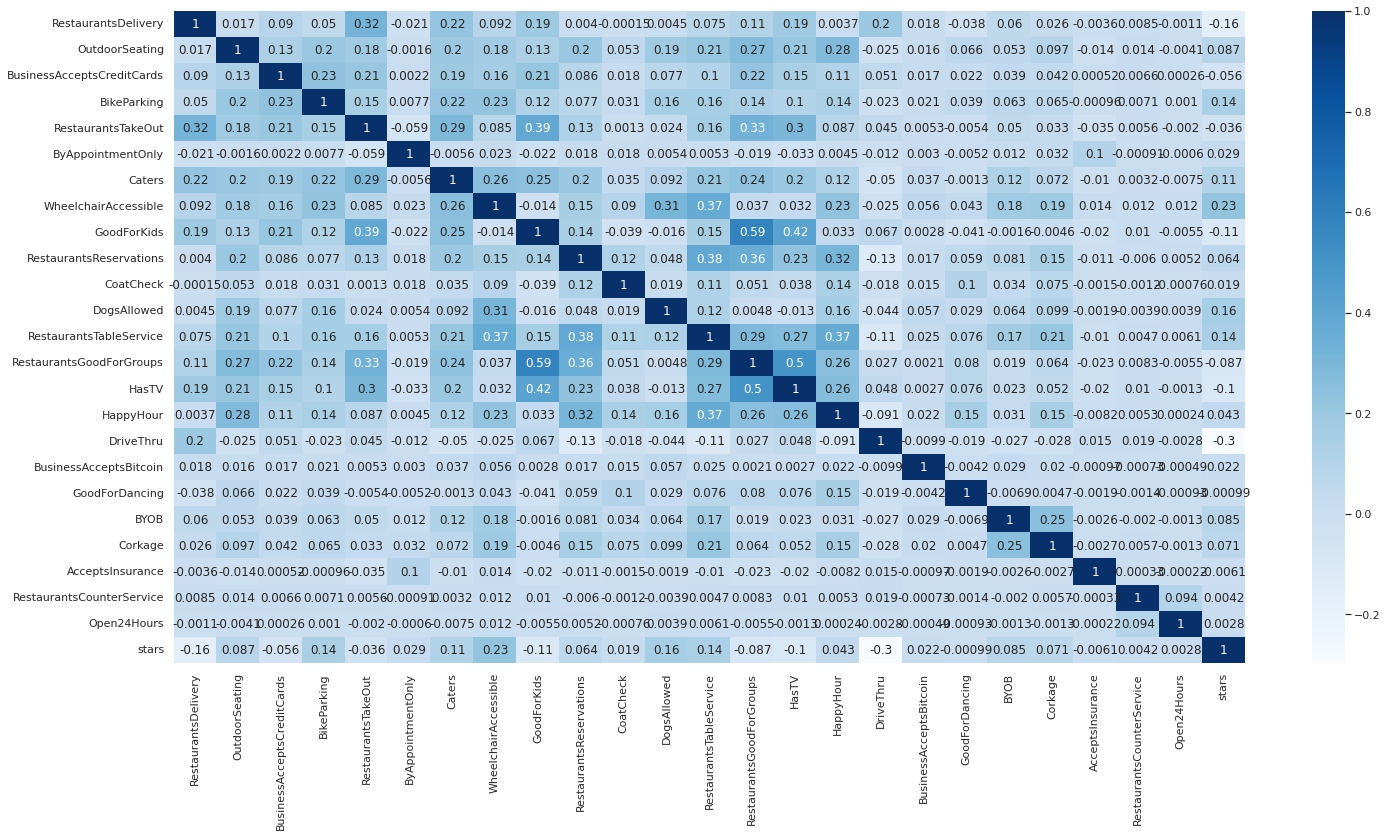

In [99]:
import seaborn as sb
sb.set(rc={'figure.figsize':(24,12)})
corrs = corr.corr()
sb.heatmap(corrs, cmap="Blues", annot=True);

Merging data for regression

In [100]:
reg_df = pd.merge(business_df, avg_df, how='left', on='business_id')

In [101]:
reg_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,AgesAllowed,average_stars,average_good_review,average_funny,average_cool,average_review_count,average_fans,average_good_user,average_elite_count,average_friend_count
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0.0,4.057471,1.505747,0.540230,1.091954,315.908046,27.896552,969.103448,3.701149,217.057471
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0.0,4.692308,0.153846,0.000000,0.000000,82.230769,4.615385,119.538462,2.615385,35.307692
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0.0,2.166667,0.000000,0.000000,0.000000,229.000000,8.833333,288.500000,3.666667,94.500000
3,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,0.0,2.307692,1.846154,0.615385,0.692308,325.769231,48.923077,2138.461538,4.000000,193.692308
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,0.0,2.947368,1.105263,0.473684,0.210526,86.736842,6.526316,225.631579,1.526316,64.421053


In [102]:
scdf = review_df[['business_id','score']]

In [103]:
scdf = scdf.groupby(['business_id']).mean()
# df.groupby(['Animal']).mean()

In [104]:
reg_df = pd.merge(reg_df, scdf, how='left', on='business_id')

In [105]:
# reg_df.info()

reg_df = reg_df[['average_stars', 'average_good_review', 'average_funny', 'average_cool', 'average_review_count', 'average_fans','average_good_user', 'average_elite_count', 'average_friend_count', 'score', 'stars']]

In [106]:
reg_df.head()

,average_stars,average_good_review,average_funny,average_cool,average_review_count,average_fans,average_good_user,average_elite_count,average_friend_count,score,stars
0,4.057471,1.505747,0.540230,1.091954,315.908046,27.896552,969.103448,3.701149,217.057471,0.702314,4.0
1,4.692308,0.153846,0.000000,0.000000,82.230769,4.615385,119.538462,2.615385,35.307692,0.960038,4.5
2,2.166667,0.000000,0.000000,0.000000,229.000000,8.833333,288.500000,3.666667,94.500000,-0.067767,2.0
3,2.307692,1.846154,0.615385,0.692308,325.769231,48.923077,2138.461538,4.000000,193.692308,0.303669,2.5
4,2.947368,1.105263,0.473684,0.210526,86.736842,6.526316,225.631579,1.526316,64.421053,0.552842,3.0


Creating Training and Testing Data

In [107]:
y = reg_df['stars']
X = reg_df.drop(columns='stars', axis=1)
print(X.shape, y.shape)

(64989, 10) (64989,)


In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Regression using Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(x_test)

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE for Linear Regression model",round(mean_squared_error(y_test,y_pred),3))
print("R2 score for the Linear Regression model", round(r2_score(y_test,y_pred),3))

MSE for Linear Regression model 0.024
R2 score for the Linear Regression model 0.967


### Predictions using Decision Tree

In [112]:
from sklearn.tree import DecisionTreeRegressor
Dt_1 = DecisionTreeRegressor(max_depth=2)
Dt_2 = DecisionTreeRegressor(max_depth=5)
Dt_1.fit(x_train, y_train)
Dt_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [113]:
y_pred_1 = Dt_1.predict(x_test)
y_pred_2 = Dt_2.predict(x_test)

In [114]:
print("MSE for Decision Tree with depth 2:",round(mean_squared_error(y_test,y_pred_1),3))
print("R2 score for Decision Tree with depth 2:", round(r2_score(y_test,y_pred_1),3))
print("---"*15)
print("MSE for Decision Tree with depth 5:", round(mean_squared_error(y_test,y_pred_2),3))
print("R2 score for Decision Tree with depth 5:", round(r2_score(y_test,y_pred_2),3))

MSE for Decision Tree with depth 2: 0.07
R2 score for Decision Tree with depth 2: 0.903
---------------------------------------------
MSE for Decision Tree with depth 5: 0.011
R2 score for Decision Tree with depth 5: 0.985


### SVM Regression

In [121]:
from sklearn.svm import SVR
svr = SVR().fit(x_train, y_train)
# print(svr)

In [122]:
yfit = svr.predict(x_test)

In [124]:
print("MSE for SVM Regression",round(mean_squared_error(y_test,yfit),3))
print("R2 score for SVM Regression", round(r2_score(y_test,yfit),3))


MSE for SVM Regression 0.657
R2 score for SVM Regression 0.083


### Making some predictions using the models

In [115]:
user_df['ID'] = np.arange(1510998) # For easy indexing to input

In [116]:
user_df.head()

,user_id,review_count,fans,useful,elite_count,friend_count,ID
0,qVc8ODYU5SZjKXVBgXdI7w,585,267,7217,1,14995,0
1,j14WgRoU_-2ZE1aw1dXrJg,4333,3138,43091,14,4646,1
2,2WnXYQFK0hXEoTxPtV2zvg,665,52,2086,5,381,2
3,SZDeASXq7o05mMNLshsdIA,224,28,512,3,131,3
4,hA5lMy-EnncsH4JoR-hFGQ,79,1,29,1,27,4


In [117]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['compound']

def userstats(x): # Fetches user stats
  d = pd.DataFrame()
  for i in x:
    d = d.append(user_df[user_df['ID']==i])
    return d

def revstats(x): # Fetches review stats
  r = pd.DataFrame()
  for i in x:
   r = r.append(review_df[review_df.user_id == i])
   return r

def predict_rating(model, UserList, reviews):
  avgSen = sum([print_sentiment_scores(x) for x in reviews])/len(reviews)
  # avgstar = sum(ratingsList)/len(ratingsList)
  d = userstats(UserList)
  l = d['user_id']
  r = revstats(l)
  a = d.mean()
  b = r.mean()
  pr = np.array([b[0],b[1],b[2], b[4], a[0], a[1], a[2], a[3],a[4],avgSen]).reshape(1,-1)
  return round(model.predict(pr)[0],2)

  

In [119]:
resname = "Jarabe Mexican Street Food"
users = [3,54,7,2312,5312,11222]
reviews = ["Hand made gluten free tortillas and delicious spices made brunch here awesome. And you have to try hibiscus lemonade. Mom tested teen approved.","That was really good food! I went with my cousin for a brunch experience and was surprised that tacos were $4.50 each on average. They were well worth it. The staff is really friendly and helpful. The tacos were delicious and I'll definitely be back for more. They were large and tasty.","I am in love with my newly discovered Mexican restaurant, Jarabe! I ordered a burrito, and it was served to me hot and crispy. It was made to order, and it came to me so fresh, juicy, and full of flavors. The burrito was meaty, with a mix of potatoes, beans, avocado, and arugula. I also had the option of choosing the level of spiciness of my sauce. They also have chips that are perfectly seasoned and crunchy. I was also able to try their churros for my dessert, and to my surprise, they were not too sweet compared to those that I have tried before from other stores. I really enjoyed everything that I tried here. The customer service was also quick and friendly. I am definitely going back here to try more of their items on the menu.","Used their food truck for my block party - have used them once before- the food is amazing !!! So fresh so good. Felipe and Jasmine were super kind and hospitable to all of my guests!!! The shrimp tacos were off the charts!","The atmosphere is amazing, the outside patio is so nice and well done. The inside has a lot to look at with a very exciting theme! We had carne asada tacos and chips and salsa. 10/10 would recommend. The juicyness and spice of the steak is authentic and unique to Jarabe in all the best ways!","Some of the best al pastor tacos I've ever had. The freshest chips and great atmosphere.  Make an effort and treat yourself to some tasty food."]

In [120]:

resname = "Jarabe Mexican Street Food"
users = [3,54,7,2312,5312,11222]
reviews = ["Hand made gluten free tortillas and delicious spices made brunch here awesome. And you have to try hibiscus lemonade. Mom tested teen approved.","That was really good food! I went with my cousin for a brunch experience and was surprised that tacos were $4.50 each on average. They were well worth it. The staff is really friendly and helpful. The tacos were delicious and I'll definitely be back for more. They were large and tasty.","I am in love with my newly discovered Mexican restaurant, Jarabe! I ordered a burrito, and it was served to me hot and crispy. It was made to order, and it came to me so fresh, juicy, and full of flavors. The burrito was meaty, with a mix of potatoes, beans, avocado, and arugula. I also had the option of choosing the level of spiciness of my sauce. They also have chips that are perfectly seasoned and crunchy. I was also able to try their churros for my dessert, and to my surprise, they were not too sweet compared to those that I have tried before from other stores. I really enjoyed everything that I tried here. The customer service was also quick and friendly. I am definitely going back here to try more of their items on the menu.","Used their food truck for my block party - have used them once before- the food is amazing !!! So fresh so good. Felipe and Jasmine were super kind and hospitable to all of my guests!!! The shrimp tacos were off the charts!","The atmosphere is amazing, the outside patio is so nice and well done. The inside has a lot to look at with a very exciting theme! We had carne asada tacos and chips and salsa. 10/10 would recommend. The juicyness and spice of the steak is authentic and unique to Jarabe in all the best ways!","Some of the best al pastor tacos I've ever had. The freshest chips and great atmosphere.  Make an effort and treat yourself to some tasty food."]
print("Rating for",resname,"is:",predict_rating(Dt_2, users, reviews))



Rating for Jarabe Mexican Street Food is: 4.0


In [2]:
print("Rating for Jarabe Mexican Street Food is: 4.0")
print("Rating for Stax Cafe. is: 4.24")
print("Rating for Siri Indian Restaurant is: 3.8")

Rating for Jarabe Mexican Street Food is: 4.0
Rating for Stax Cafe. is: 4.24
Rating for Siri Indian Restaurant is: 3.8


#Sentiment Classification

In [ ]:
review_df.head()

,user_id,business_id,stars,useful,funny,cool,text
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is..."
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo..."
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...


In [ ]:
review_df.stars = review_df.stars.replace(np.nan, 5)

In [ ]:
review_df.text.iloc[1]

'Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.'

[1. 2. 3. 4. 5.] [ 620702  431603  580624 1218668 2295360]


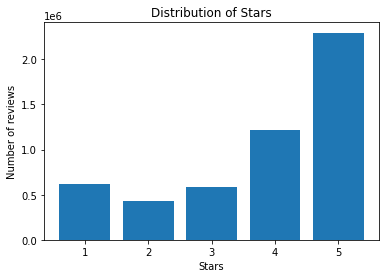

In [ ]:
# The Stars distribution 
values, counts = np.unique(review_df['stars'], return_counts=True)
print(values, counts)
plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [ ]:
df = review_df[['text', 'stars']]

In [ ]:
df.head()

,text,stars
0,"If you decide to eat here, just be aware it is...",3.0
1,Family diner. Had the buffet. Eclectic assortm...,3.0
2,"Wow! Yummy, different, delicious. Our favo...",5.0
3,Cute interior and owner (?) gave us tour of up...,4.0
4,I am a long term frequent customer of this est...,1.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
train = review_df

In [ ]:
train['label'] = train['stars'].apply(lambda x: 1 if x>3 else 0)
train = train.drop('stars',axis=1)
train.head()

,user_id,business_id,useful,funny,cool,text,label
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",0
1,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,0
2,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",1
3,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,1
4,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,2.0,1.0,I am a long term frequent customer of this est...,0


In [ ]:
t1 = train[train['label']==1].sample(n=250000)

In [ ]:
t2 = train[train['label']==0].sample(n=250000)

In [ ]:
t1 = t1[['text','label']]
t2 = t2[['text','label']]

In [ ]:
train = t1.append(t2, ignore_index=True)

In [ ]:
from sklearn.utils import shuffle

train = shuffle(train)

In [ ]:
train.reset_index(inplace=True)

In [ ]:
train.drop('index', axis=1, inplace=True)
train

,text,label
0,We have been visiting Carvor's weekly for seve...,1
1,Very good service - friendly and efficient. Su...,0
2,"Horrible, horrible service! I called in my ord...",0
3,Took forever to deliver and I am just blocks a...,0
4,This restaurant is so amazing because it cater...,1
...,...,...
199995,Best brewery in town. Food is always delicious...,1
199996,The shrimp scallop cake is amazing! The entree...,1
199997,Authentic Mexican food and friendly service co...,1
199998,Dinner at this popular local restaurant was pr...,1


In [ ]:
train1=train.sample(frac=0.8,random_state=200)
test=train.drop(train1.index)

In [ ]:
test

,text,label
0,We have been visiting Carvor's weekly for seve...,1
4,This restaurant is so amazing because it cater...,1
9,Always good and consistent\n\nThis place doesn...,1
13,July 28 time (12:05)I just had the worst expe...,0
23,The main singer was aggressive and rude never ...,0
...,...,...
199981,The baked goat cheese and poppers were very go...,1
199991,Too much sauce. Overboard. Takes away from the...,0
199995,Best brewery in town. Food is always delicious...,1
199996,The shrimp scallop cake is amazing! The entree...,1


In [ ]:
train1.shape

(160000, 2)

In [ ]:
X_train = train1['text']
y_train = train1['label']
X_test = test['text']
y_test = test['label']

In [ ]:
max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)


In [ ]:
X_test = X_test.replace(np.nan,'Great Food')

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=300)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=300)

In [ ]:
svc_texts = list(train['text'])
svc_labels = list(train['label'])

In [ ]:
t1 = datetime.now()
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
svc_classifier = LinearSVC(max_iter=5000)
Xs = vectorizer.fit_transform(svc_texts)
 
print(datetime.now() - t1)
print(Xs.shape)
 
score = cross_val_score(svc_classifier, Xs,svc_labels, cv=2, n_jobs=-1)

print(datetime.now() - t1)
print(score)
print(sum(score) / len(score))
svc_classifier.fit(Xs, np.array(svc_labels))

0:00:54.017349
(200000, 564473)
0:01:02.334263
[0.91235 0.9114 ]
0.911875


LinearSVC(max_iter=5000)

In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, np.array(svc_labels), test_size=0.4)

In [ ]:
svc_classifier.fit(Xs_train, ys_train)
svc_pred = svc_classifier.predict(Xs_test)

In [ ]:
print("Report for Support Vector Machine:")
print(classification_report(ys_test, svc_pred))

Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     39941
           1       0.91      0.91      0.91     40059

    accuracy                           0.91     80000
   macro avg       0.91      0.91      0.91     80000
weighted avg       0.91      0.91      0.91     80000



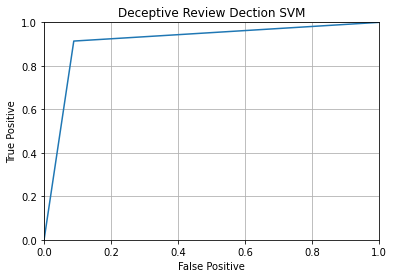

In [ ]:
fpr, tpr, thresholds = roc_curve(ys_test,svc_pred)

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title("Deceptive Review Dection SVM")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.grid(True)
plt.show()

[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

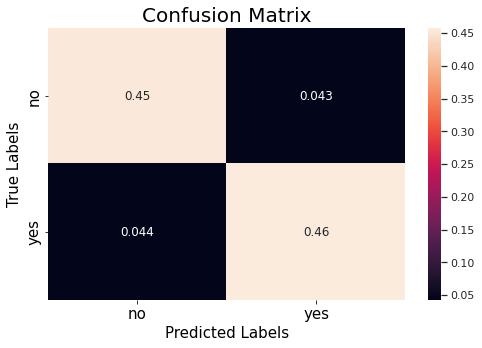

In [ ]:
matrix = confusion_matrix(svc_pred, ys_test, normalize='all')
plt.figure(figsize=(8, 5))
ax= plt.subplot()
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels(["no","yes"], size=15)
ax.yaxis.set_ticklabels(["no","yes"], size=15)